# Get errors in diarization and select ONLY THESE for a new rttm file

In [51]:
# import relevant pyannote libraries
from pyannote.metrics.errors.identification import IdentificationErrorAnalysis
from pyannote.database.util import load_rttm
from pyannote.core import Annotation, notebook, Segment

from pathlib import Path
import pandas as pd
import json

In [9]:
def load_this_rttm(rttm_path):
    """
    Load an RTTM file that should have ONE k, v pair
    """
    # load gold rttm
    rttm_dict = load_rttm(rttm_path)
    # this is a dict and should have a single key
    rkey = list(rttm_dict.keys())
    if len(rkey) != 1:
        exit("This dict doesn't have the right number of annotations"
             "Annotations expected: 1"
             f"Annotations seen: {len(rkey)}")
    else:
        the_annotation = rttm_dict[rkey[0]]

    return the_annotation

In [ ]:
def return_errors_as_rttm(gold_rttm_path, pred_rttm_path):
    # load rttms
    gold_annotation = load_this_rttm(gold_rttm_path)
    pred_annotation = load_this_rttm(pred_rttm_path)

    # get difference
    diff = IdentificationErrorAnalysis().difference(reference=gold_annotation,
                                                  hypothesis=pred_annotation)

    save_name = pred_rttm_path.split(".rttm")[0] + "_difference.rttm"

    with open(save_name, 'w') as save_f:
        diff.write_rttm(save_f)

In [41]:
def subset_diff_rttm(diff_rttm):
    """
    Get the subset of the diff rttm
    Have to do this as pandas df as the rttm loader
    from pyannote does not read this in correctly
    """
    diff = pd.read_csv(diff_rttm,
                       header=None,
                       names=["na0",
                              "file",
                              "num",
                              "start_time",
                              "dur",
                              "na1",
                              "na2",
                              "speaker",
                              "na3",
                              "na4"],
                       sep=" ")

    #diff = diff[diff["speaker"][0] == "missed detection"]
    
    return diff

In [35]:
BASE_PATH = "/media/jculnan/backup/From LIVES folder"
diarized = f"{BASE_PATH}/diarized_files/REddff648585df12737ae0381434a2a56a.rttm"
gold = f"{BASE_PATH}/diarization_effort/manually_annotated/test_all/REddff648585df12737ae0381434a2a56a.rttm"
diff = f"{BASE_PATH}/diarized_files/difference_rttms/REddff648585df12737ae0381434a2a56a_difference.rttm"

In [42]:
diff_ann = subset_diff_rttm(diff)

In [47]:
gold_ann = load_this_rttm(gold)
pred_ann = load_this_rttm(diarized)

diff = IdentificationErrorAnalysis().difference(reference=gold_ann, hypothesis=pred_ann)

/home/jculnan/.local/lib/python3.8/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


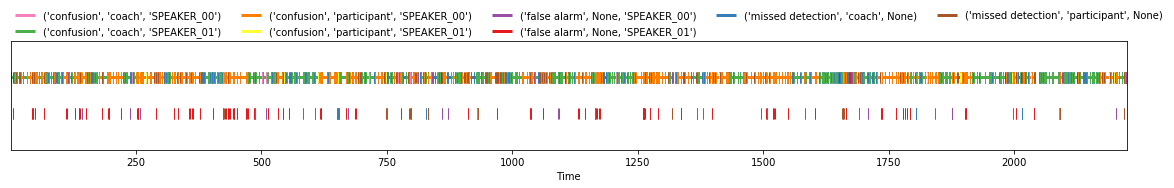

In [48]:
diff

In [86]:
x = diff.for_json()

In [87]:
# get subset of this dict that includes missed detection only 
y = [item for item in x['content'] if item['label'][0] == 'missed detection']

In [90]:
y

[{'track': 'missed detection0',
  'label': 'missed detection',
  'start': 1.4357152069090524,
  'end': 1.797,
  'speaker': 'coach'},
 {'track': 'missed detection0',
  'label': 'missed detection',
  'start': 4.278,
  'end': 4.328574205904904,
  'speaker': 'coach'},
 {'track': 'missed detection0',
  'label': 'missed detection',
  'start': 8.243,
  'end': 8.300005325514023,
  'speaker': 'coach'},
 {'track': 'missed detection0',
  'label': 'missed detection',
  'start': 11.551,
  'end': 11.564293134257492,
  'speaker': 'participant'},
 {'track': 'missed detection0',
  'label': 'missed detection',
  'start': 17.811999999999998,
  'end': 17.814297144433716,
  'speaker': 'coach'},
 {'track': 'missed detection0',
  'label': 'missed detection',
  'start': 19.769000000000002,
  'end': 20.647,
  'speaker': 'participant'},
 {'track': 'missed detection0',
  'label': 'missed detection',
  'start': 24.258,
  'end': 24.28572986811333,
  'speaker': 'participant'},
 {'track': 'missed detection0',
  'lab

In [89]:
for item in y:
    # put start and end in their own categories
    item['start'] = item['segment']['start']
    item['end'] = item['segment']['end']
    del item['segment']
    # put missed detection and speaker in their own categories
    item['speaker'] = item['label'][1]
    item['label'] = item['label'][0]

In [91]:
z = pd.DataFrame(y)


In [92]:
z

,track,label,start,end,speaker
0,missed detection0,missed detection,1.435715,1.797000,coach
1,missed detection0,missed detection,4.278000,4.328574,coach
2,missed detection0,missed detection,8.243000,8.300005,coach
3,missed detection0,missed detection,11.551000,11.564293,participant
4,missed detection0,missed detection,17.812000,17.814297,coach
...,...,...,...,...,...
653,missed detection0,missed detection,2204.137000,2204.609000,participant
654,missed detection0,missed detection,2209.435539,2209.722000,coach
655,missed detection0,missed detection,2214.683000,2214.903000,coach
656,missed detection0,missed detection,2217.818880,2219.024437,participant


In [71]:
z

,segment,track,label,start
0,"{'start': 1.4357152069090524, 'end': 1.797}",missed detection0,"(missed detection, coach, None)","{'start': 1.4357152069090524, 'end': 1.797}"
1,"{'start': 4.278, 'end': 4.328574205904904}",missed detection0,"(missed detection, coach, None)","{'start': 4.278, 'end': 4.328574205904904}"
2,"{'start': 8.243, 'end': 8.300005325514023}",missed detection0,"(missed detection, coach, None)","{'start': 8.243, 'end': 8.300005325514023}"
3,"{'start': 11.551, 'end': 11.564293134257492}",missed detection0,"(missed detection, participant, None)","{'start': 11.551, 'end': 11.564293134257492}"
4,"{'start': 17.811999999999998, 'end': 17.814297...",missed detection0,"(missed detection, coach, None)","{'start': 17.811999999999998, 'end': 17.814297..."
...,...,...,...,...
653,"{'start': 2204.137, 'end': 2204.609}",missed detection0,"(missed detection, participant, None)","{'start': 2204.137, 'end': 2204.609}"
654,"{'start': 2209.435538543689, 'end': 2209.722}",missed detection0,"(missed detection, coach, None)","{'start': 2209.435538543689, 'end': 2209.722}"
655,"{'start': 2214.683, 'end': 2214.903}",missed detection0,"(missed detection, coach, None)","{'start': 2214.683, 'end': 2214.903}"
656,"{'start': 2217.818880244332, 'end': 2219.02443...",missed detection0,"(missed detection, participant, None)","{'start': 2217.818880244332, 'end': 2219.02443..."


In [ ]:
z['start'] = z.apply(lambda x: x['segment']['start'])
z['end'] = z.apply(lambda x: x['segment']['end'])

In [55]:
with open("testme.json", 'w') as jfile:
    json.dump(x, jfile)

In [13]:
type(diff)

pyannote.core.annotation.Annotation

In [15]:
missed_coach = diff.subset(('missed detection', 'coach', None))

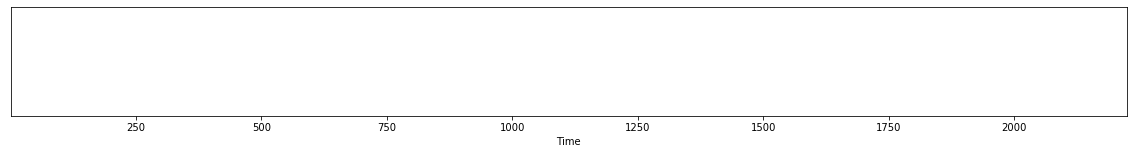

In [16]:
missed_coach

In [18]:
missed_pt = diff.subset(('missed detection', 'participant', None))

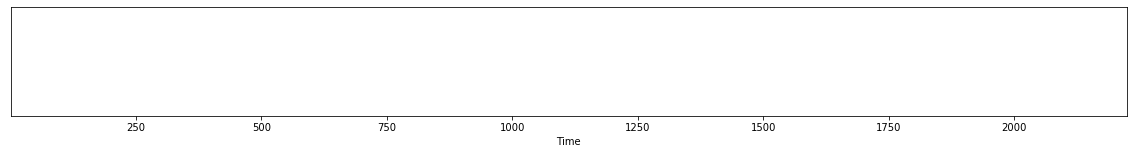

In [30]:
missed_pt

In [27]:
diff.labels()

[('confusion', 'coach', 'SPEAKER_00'),
 ('confusion', 'coach', 'SPEAKER_01'),
 ('confusion', 'participant', 'SPEAKER_00'),
 ('confusion', 'participant', 'SPEAKER_01'),
 ('false alarm', None, 'SPEAKER_00'),
 ('false alarm', None, 'SPEAKER_01'),
 ('missed detection', 'coach', None),
 ('missed detection', 'participant', None)]

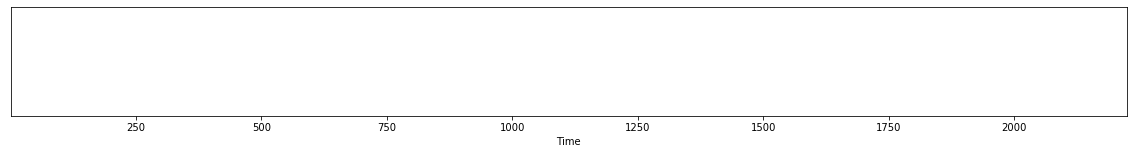

In [33]:
conf1 = diff.subset(('confusion', 'coach', 'SPEAKER_00'))